In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def print_img(img, label=""):
    # 顯示圖片用
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(label)
    plt.xlabel("type:{}, shape:{}".format(img.dtype, img.shape))
    plt.show()

In [3]:
def rd_noise(img, th=0.1):
    '''
    隨機雜訊

    img      = 圖像
    th       = 雜訊佔比
    '''
    output = np.array(img, dtype=np.uint8)
#     for h in range(img_gray.shape[0]):
#         for w in range(img_gray.shape[1]):
#             r = np.random.rand()
#             if r < th:
#                 output[h][w] = np.random.randint(0, 255)
    r = np.random.rand(*img.shape)
    rcolor = np.random.randint(0, 255, img.shape)
    output[r < th] = rcolor[r < th]
    return output

def sp_noise(img, th=0.1):
    '''
    椒鹽雜訊

    img      = 圖像
    th       = 雜訊佔比
    '''
    output = np.array(img, dtype=np.uint8)
#     for h in range(img_gray.shape[0]):
#         for w in range(img_gray.shape[1]):
#             r = np.random.rand()
#             if r < th:
#                 output[h][w] = 0
#             elif r > th2:
#                 output[h][w] = 255
    r = np.random.rand(*img.shape)
    output[r < (th*0.5)] = 0
    output[r > (1 - (th*0.5))] = 255
    return output

def gs_noise(img, mean=0, var=0.01):
    '''
    高斯雜訊

    img      = 圖像
    mean     = 均值
    var      = 方差
    '''
    output = np.array(img, dtype=np.float32) / 255
    noise = np.random.normal(mean, var**0.5, img.shape)
    output = (output + noise) * 255
    output[output<0] = 0
    output[output>255] = 255
    return np.uint8(output)


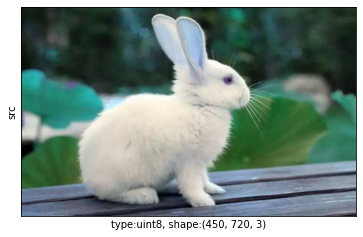

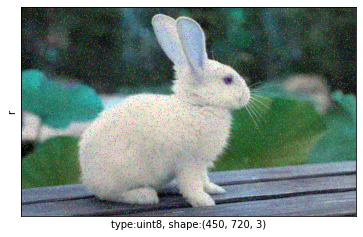

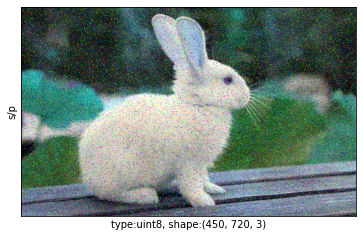

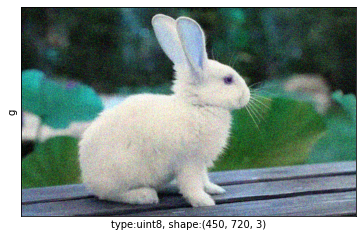

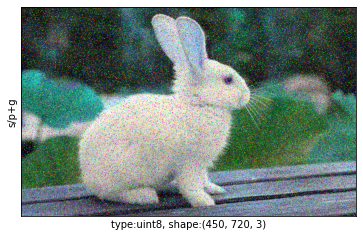

In [4]:
src = cv.imread('../image/rbt.jpg')
nsrc = {
    "src": src,
    "r" : rd_noise(src),
    "s/p" : sp_noise(src),
    "g" : gs_noise(src),
    "s/p+g": gs_noise(sp_noise(src)),
}
for k, v in nsrc.items():
    print_img(v, k)

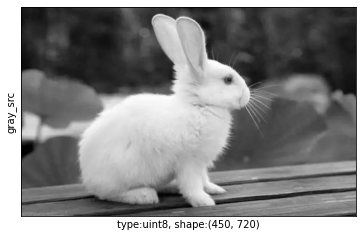

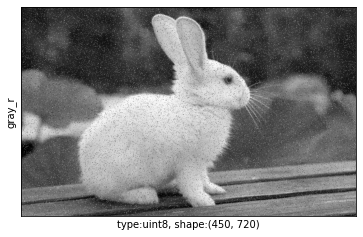

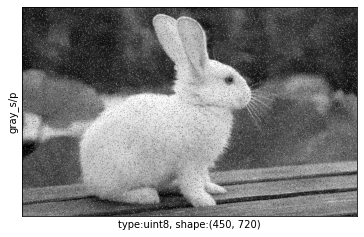

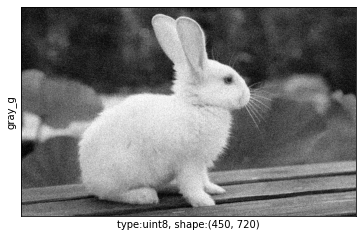

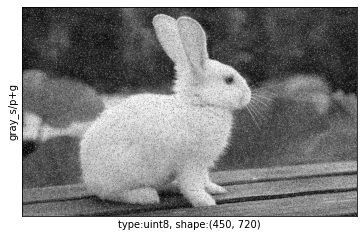

In [5]:
ngray = {}
for k, v in nsrc.items():
    ngray[k] = cv.cvtColor(v, cv.COLOR_RGB2GRAY)
    print_img(ngray[k], 'gray_' + k)

# 均值模糊
* 不錯的抑制雜訊
* filter過大會讓圖像特徵模糊

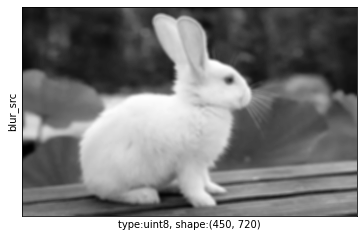

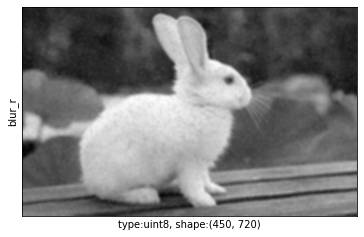

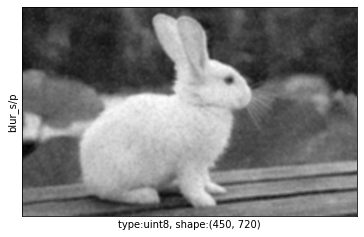

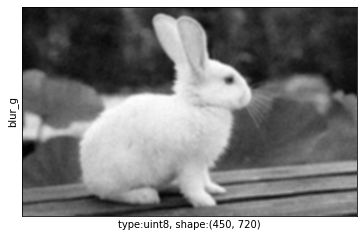

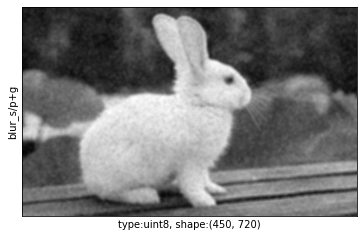

In [6]:
# 均值模糊

# xblur = cv.blur(rd_gray, (5, 1)) # 對水平進行模糊處理
# print_img(xblur)
# yblur = cv.blur(rd_gray, (1, 5)) # 對垂直進行模糊處理
# print_img(yblur)
for k, v in ngray.items():
    xyblur = cv.blur(v, (7, 7))
    print_img(xyblur, 'blur_' + k)

# 中值模糊
* 對隨機雜訊及椒鹽雜訊有很好的效果
* filter過大會對細節有影響

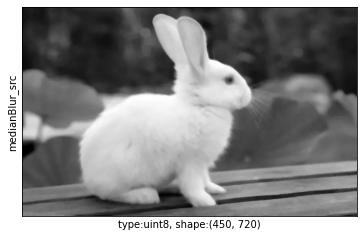

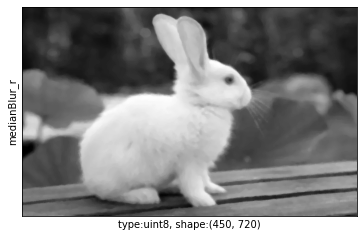

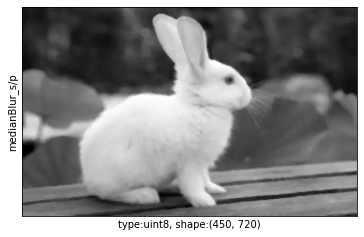

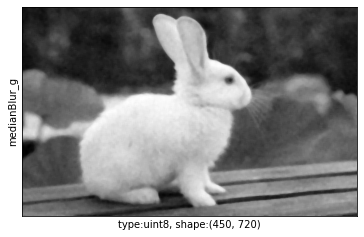

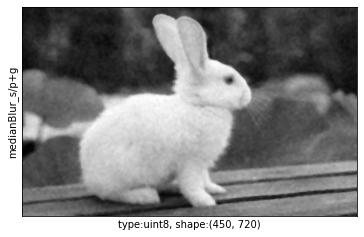

In [7]:
# 中值模糊
for k, v in ngray.items():
    mblur = cv.medianBlur(v, 7, 7)
    print_img(mblur, 'medianBlur_' + k)

# 高斯模糊
* 可消除高斯雜訊
* 與均值模糊相比保留更多細節
* 邊緣有可能會消失

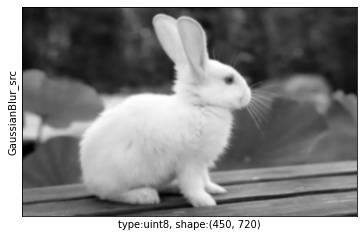

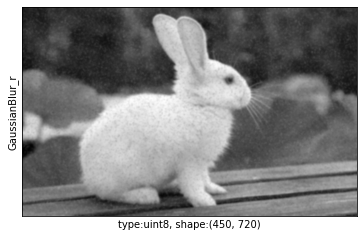

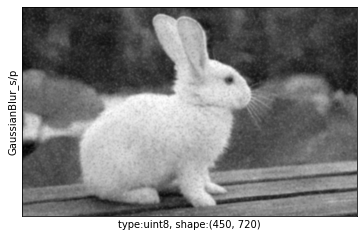

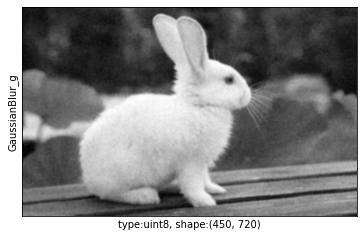

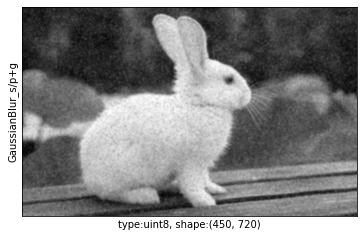

In [8]:
# 高斯模糊
for k, v in ngray.items():
    gblur = cv.GaussianBlur(v, (7, 7), 0)
    print_img(gblur, 'GaussianBlur_' + k)

# 雙邊濾波
* 可消除高斯雜訊
* 保留邊緣
* 高頻雜訊會被保留

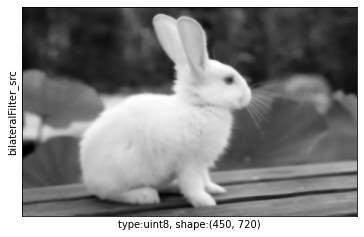

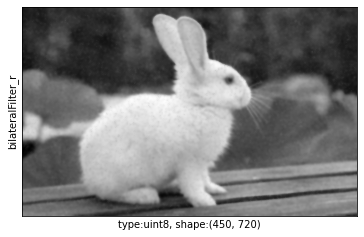

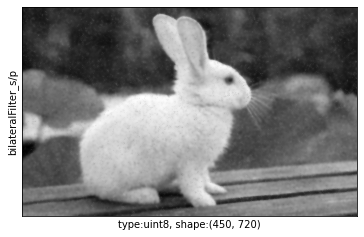

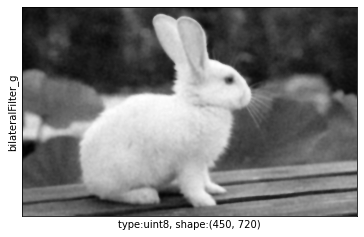

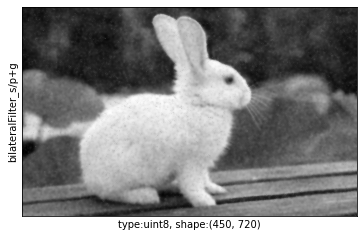

In [9]:
# 雙邊濾波
for k, v in ngray.items():
    bblur = cv.bilateralFilter(v, 0, 100, 3)
    print_img(bblur, 'bilateralFilter_' + k)